### For the same statistical areas, plot salary of postdocs and salary of everyone else

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


In [49]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')

In [50]:
len(university_df)

224

In [14]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,CSA,CITY,STATE,LONGITUDE,LATITUDE,INSTNM,IALIAS,CBSA,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,REAL_MEDIAN_SALARY,UNIVERSITY_SALARY_RELATIVE_MEDIAN
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,148,Cambridge,MA,-71.118313,42.374471,Harvard University,,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,48297.784952,106.993219
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,488,Stanford,CA,-122.167359,37.429434,Stanford University,,"San Jose-San Francisco-Oakland, CA",NaN,NaN,NaN,NaN,62476.603840,NaN,119.829699
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,148,Cambridge,MA,-71.093226,42.359243,Massachusetts Institute of Technology,"MIT, M.I.T.","Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,49056.118257,108.673141


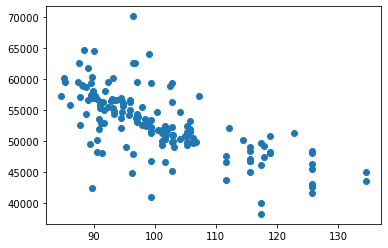

In [15]:
plt.scatter(
    university_df["RPP_all"].values,
    university_df["REAL_MEDIAN_SALARY"].values,
)

In [23]:
income_df = pd.read_csv(DATA_DIR / 'income' / 'income.csv', skiprows=4)
income_df = income_df[income_df.Description == 'Real per capita personal income (chained (2012) dollars) 2/'] 
income_df["RPI_per_capita"] = income_df["2019"]
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)
cost_of_living_df['RPPs'] = cost_of_living_df['2019']
income_by_COL = cost_of_living_df[['RPPs', 'GeoName']].merge(income_df[['RPI_per_capita', 'GeoName']], on='GeoName')
income_by_COL['statistical_area'] = [i.split(' (')[0] for i in income_by_COL.GeoName.values]
income_by_COL[:10]

,RPPs,GeoName,RPI_per_capita,statistical_area
0,100.0,United States,51424.0,United States
1,98.8,United States,51424.0,United States
2,102.0,United States,51424.0,United States
3,100.0,United States,51424.0,United States
4,90.3,"Abilene, TX (Metropolitan Statistical Area)",46336.0,"Abilene, TX"
5,96.0,"Abilene, TX (Metropolitan Statistical Area)",46336.0,"Abilene, TX"
6,80.1,"Abilene, TX (Metropolitan Statistical Area)",46336.0,"Abilene, TX"
7,91.2,"Abilene, TX (Metropolitan Statistical Area)",46336.0,"Abilene, TX"
8,90.0,"Akron, OH (Metropolitan Statistical Area)",52131.0,"Akron, OH"
9,95.9,"Akron, OH (Metropolitan Statistical Area)",52131.0,"Akron, OH"


64783.0

In [34]:
regional_incomes = []
for idx, row in university_df.iterrows():
    regional_income_2012 = income_by_COL[(income_by_COL.statistical_area == row.CBSA)].RPI_per_capita.values
    
    if len(regional_income_2012) >0:
        regional_incomes.append(regional_income_2012[0])
    else:
        print(row.institution)
        regional_incomes.append(np.nan)

Stanford University
Washington University in St. Louis
University of California, Davis
Vanderbilt University
University of Maryland, College Park
University of Notre Dame
Georgia Institute of Technology
Tufts University
Arizona State University
Stony Brook University
Indiana University-Purdue University Indianapolis
University of Georgia
University of Connecticut
University of Kentucky
Tulane University
University of Delaware
University of Louisville
Boston College
Louisiana State University - Baton Rouge
University of Oklahoma - Norman Campus
College of William and Mary
Saint Louis University
Colorado School of Mines
Washington State University, Pullman
George Mason University
Miami University
Ohio University
University of Wyoming
Clemson University
SUNY Downstate Medical Center
New Mexico State University
New York Medical College
University of Missouri–Kansas City
Montana State University - Bozeman
Kent State University
University of Montana - Missoula
University of Rhode Island
Loui

In [38]:
university_df["regional_income_2012"] = regional_incomes

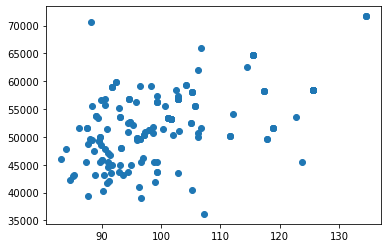

In [41]:
plt.scatter(
    university_df["RPP_all"].values,
    university_df["regional_income_2012"].values,
)

In [43]:
import seaborn as sns

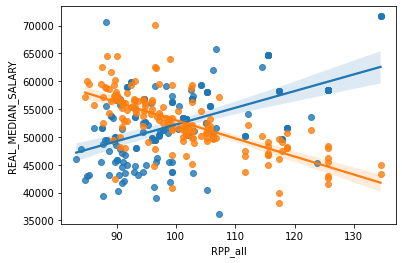

In [47]:
fig, ax = plt.subplots()
sns.regplot(x="RPP_all", y="regional_income_2012", data=university_df, ax = ax)
sns.regplot(x="RPP_all", y="REAL_MEDIAN_SALARY", data=university_df, ax = ax)